# Effect of Different Regularization Methods

## 1. Introduction

Deep Learning models have so much flexibility and capacity that **overfitting can be a serious problem**, if the training dataset is not big enough. Sure it does well on the training set, but the learned network **doesn't generalize to new examples** that it has never seen.

We will use different **regularization** methods (no regularization, L2 regularization, and inverted dropout) in our deep learning models, and compare the results. 

We will use Xavier initialization.

## 2. Import Packages and Set Default Parameters

- util_func provides some necessary functions for the calculations, e.g., Sigmoid, RELU.
- deep_neural_network.py provides the functions to construct deep neural network

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import numpy as np
from deep_neural_network import *
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import scipy

plt.rcParams['figure.figsize'] = (7.0, 4.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray' # set colormap

## 3. Data Set

In [2]:
def load_2D_dataset():
    data = scipy.io.loadmat('2D_data.mat')
    train_x = data['X'].T
    train_y = data['y'].T.astype(int) # Convert from unit8 (Unsigned integer (0 to 255)) to int
    test_x = data['Xval'].T
    test_y = data['yval'].T.astype(int)
    plt.scatter(train_x[0, :], train_x[1, :], c = train_y[0, :], cmap = plt.cm.Spectral)
    plt.title("training set")
    return train_x, train_y, test_x, test_y

Total number of training examples: 211
Total number of test examples: 200
train_x shape: (2, 211)
train_y shape: (1, 211)
test_x shape: (2, 200)
test_y shape: (1, 200)
Example of y values:[1 1 1 1 1 0 0 0 0 0]


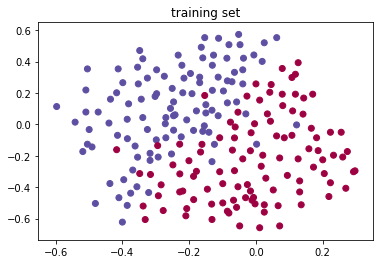

In [3]:
train_x, train_y, test_x, test_y = load_2D_dataset()
print("Total number of training examples: " + str(train_x.shape[1]))
print("Total number of test examples: " + str(test_x.shape[1]))
print("train_x shape: " + str(train_x.shape))
print("train_y shape: " + str(train_y.shape))
print("test_x shape: " + str(test_x.shape))
print("test_y shape: " + str(test_y.shape))
print("Example of y values:" + str(train_y[0, 15:25]))

## 4. Some Useful Functions

In [4]:
# use the trained params to predict the output

def predict(params, X):
    """
    Arguments: 
    X: input features
    params: trained weight matrices and bias vectors of the neural network
    
    Returns:
    predicted labels for X, with the shape of (1, number of examples)
    """
    Aout, _ = L_layer_forward(X, params)
    m = X.shape[1] # number of examples
    Aout.reshape(1, m)
    Aout = (Aout > 0.5)
    
    return Aout

In [5]:
# print the model accuracy

def accuracy(params, X, Y):
    """
    Arguments:
    X: input features
    params: trained weight matrices and bias vectors of the neural network
    Y: true labels
    """
    Aout = predict(params, X)
    m = X.shape[1]
    print("Accuracy: " + str(np.sum(Aout == Y) / m))

In [6]:
# plot the decision boundary contour

def plot_dicision_boundary(model, X, Y):
    """
    Arguments:
    model: the function that inputs X and outputs the predicted labels.
    X: the input features
    Y: the true labels
    """
    # set min and max values and give some padding
    x1_min, x1_max = min(X[0, :]) - 1, max(X[0, :]) + 1
    x2_min, x2_max = min(X[1, :]) - 1, max(X[1, :]) + 1
    h = 0.01 # interval of the grid
    
    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
    # flatten x1 and x2 to 1-D arrays, concatenate along second axis, and transpose
    Z = model(np.c_[x1.ravel(), x2.ravel()].T) # Z.shape = (1, total number of grid points)
    Z = Z.reshape(x1.shape)

    # plot the contour  
    plt.contourf(x1, x2, Z, cmap = plt.cm.Spectral)
    plt.scatter(X[0, :], X[1, :], c = Y[0, :], s = 40, cmap = plt.cm.Spectral)
    plt.show()

## 5. Non-Regularized

### 5.1 Model Training

current iteration: 1, cost: 0.6557412523481002
current iteration: 6000, cost: 0.16971888571056906
current iteration: 12000, cost: 0.16172703941026606
current iteration: 18000, cost: 0.14412563057014757
current iteration: 24000, cost: 0.13241293302868354
current iteration: 30000, cost: 0.1250913124533616


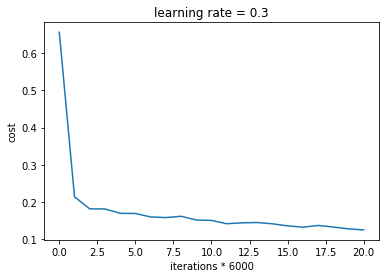

In [7]:
layer_dims = [train_x.shape[0], 20, 3, 1] # number of units in each layer, including the input and output layers

# train the neural network
params_no_regul = L_layer_model(train_x, train_y, layer_dims, params_seed = 3, learning_rate = 0.3, iterations = 30000, 
                                print_cost_freq = 6000, save_cost_freq = 1500, initialization = "xavier", 
                                regularization = "none")

In [8]:
print("For the training set:")
accuracy(params_no_regul, train_x, train_y)
print("For the test set:")
accuracy(params_no_regul, test_x, test_y)

For the training set:
Accuracy: 0.9478672985781991
For the test set:
Accuracy: 0.915


### 5.2 Result Analysis

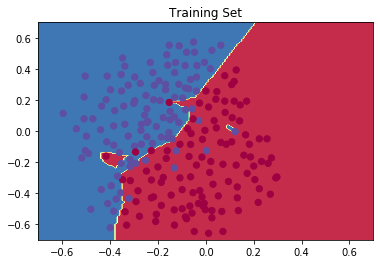

In [9]:
# plot the decision boundary for the training set

axes = plt.gca()
axes.set_xlim([-0.7, 0.7])
axes.set_ylim([-0.7, 0.7])
plt.title("Training Set")
plot_dicision_boundary(lambda x : predict(params_no_regul, x), train_x, train_y)

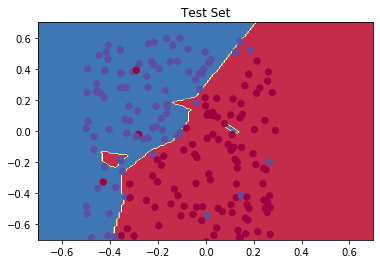

In [10]:
# plot the decision boundary for the test set

axes = plt.gca()
axes.set_xlim([-0.7, 0.7])
axes.set_ylim([-0.7, 0.7])
plt.title("Test Set")
plot_dicision_boundary(lambda x : predict(params_no_regul, x), test_x, test_y)

We can clearly see signs of **overfitting** from the graphs.

## 6. L2 Regularization

### 6.1 Model Training

current iteration: 1, cost: 0.6974484493131264
current iteration: 6000, cost: 0.2689367634438058
current iteration: 12000, cost: 0.2683867489167247
current iteration: 18000, cost: 0.26813666101037825
current iteration: 24000, cost: 0.2679209322321695
current iteration: 30000, cost: 0.2678617428709586


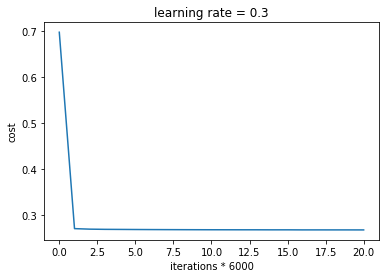

In [11]:
layer_dims = [train_x.shape[0], 20, 3, 1] # number of units in each layer, including the input and output layers

# train the neural network
params_L2 = L_layer_model(train_x, train_y, layer_dims, params_seed = 3, learning_rate = 0.3, iterations = 30000, 
                          print_cost_freq = 6000, save_cost_freq = 1500, initialization = "xavier", 
                          regularization = "L2", lambd = 0.7)

In [12]:
print("For the training set:")
accuracy(params_L2, train_x, train_y)
print("For the test set:")
accuracy(params_L2, test_x, test_y)

For the training set:
Accuracy: 0.9383886255924171
For the test set:
Accuracy: 0.93


### 6.2 Result Analysis

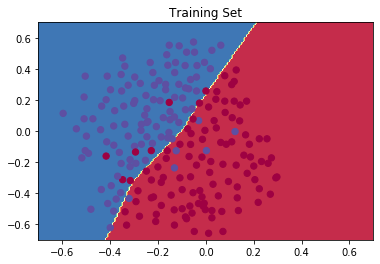

In [13]:
# plot the decision boundary for the training set

axes = plt.gca()
axes.set_xlim([-0.7, 0.7])
axes.set_ylim([-0.7, 0.7])
plt.title("Training Set")
plot_dicision_boundary(lambda x : predict(params_L2, x), train_x, train_y)

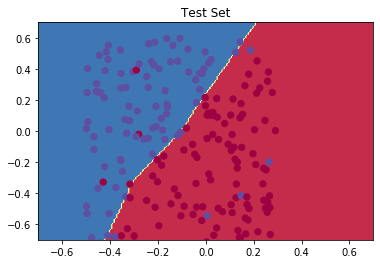

In [14]:
# plot the decision boundary for the test set

axes = plt.gca()
axes.set_xlim([-0.7, 0.7])
axes.set_ylim([-0.7, 0.7])
plt.title("Test Set")
plot_dicision_boundary(lambda x : predict(params_L2, x), test_x, test_y)

## 7. Inverted Dropout

### 7.1 Training Model Training

current iteration: 1, cost: 0.6541415436827008
current iteration: 6000, cost: 0.04183047234016717
current iteration: 12000, cost: 0.04110662777239866
current iteration: 18000, cost: 0.0409615277539877
current iteration: 24000, cost: 0.040913382405628605
current iteration: 30000, cost: 0.04088557881915887


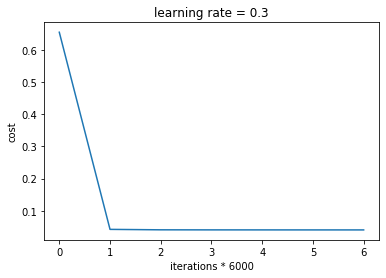

In [15]:
layer_dims = [train_x.shape[0], 20, 3, 1] # number of units in each layer, including the input and output layers

# train the neural network
params_dropout = L_layer_model(train_x, train_y, layer_dims, params_seed = 3, learning_rate = 0.3, iterations = 30000, 
                               print_cost_freq = 6000, save_cost_freq = 4500, initialization = "xavier", 
                               regularization = "none", keep_prob = 0.86)

In [16]:
print("For the training set:")
accuracy(params_dropout, train_x, train_y)
print("For the test set:")
accuracy(params_dropout, test_x, test_y)

For the training set:
Accuracy: 0.9241706161137441
For the test set:
Accuracy: 0.915


### 7.2 Result Analysis

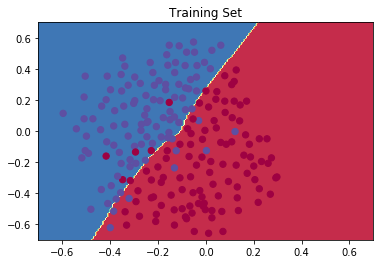

In [17]:
# plot the decision boundary for the training set

axes = plt.gca()
axes.set_xlim([-0.7, 0.7])
axes.set_ylim([-0.7, 0.7])
plt.title("Training Set")
plot_dicision_boundary(lambda x : predict(params_dropout, x), train_x, train_y)

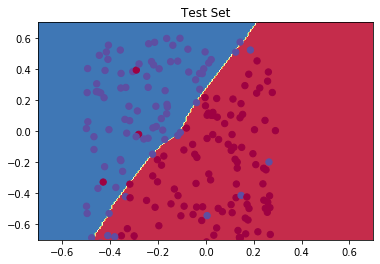

In [18]:
# plot the decision boundary for the test set

axes = plt.gca()
axes.set_xlim([-0.7, 0.7])
axes.set_ylim([-0.7, 0.7])
plt.title("Test Set")
plot_dicision_boundary(lambda x : predict(params_dropout, x), test_x, test_y)

By implementing L2 Regularization or dropout, we successfully solve the overfitting issue.